In [60]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics


print("Import Complete")

Import Complete


In [61]:
def cluster(df, df2, N, v=False):
    #print("Start loop")
    #gpercentages = []
    #singles = 0
    clusterer = KMeans(n_clusters=N)
    clusterer.fit(df2)
    transform = clusterer.transform(df2)
    
    
    d_center = []
    cluster = []
    for x in transform:
        d_center.append(min(x)**2)
        cluster.append(np.argmin(x))
    df['cluster'] = cluster
    df['d_from_center'] = d_center
    d_center = np.array(d_center)
    mean = np.mean(d_center)
    std = np.std(d_center)

    print("Mean: {}".format(round(mean, 3)))
    print("STD: {}".format(round(std, 3)))
    print("")

  

    if v == True:
        for cgroup in range(N):
            group = df.groupby('cluster').get_group(cgroup)
            print_clusters(group)

    
    return df

def print_clusters(group):
    print("Found {} messages of the same form.".format(len(group)))
    for message in group.question_class.head(5):
        if group.question_class.count() > 1:
            print(message)
            print("")
    print("")

In [62]:
def plot_clusters(df, N):
    features = list(df.features)
    svd = TruncatedSVD(n_components=2, n_iter=2, random_state=42)

    transformed = pd.DataFrame(svd.fit_transform(features), columns=["plot_cordX", "plot_cordY"])
    meanX = transformed["plot_cordX"].mean()
    meanY = transformed["plot_cordY"].mean()
    transformed["plot_cordX"] = transformed["plot_cordX"].divide(meanX) - 1
    transformed["plot_cordY"] = transformed["plot_cordY"].divide(meanY) - 1
    meanX = transformed["plot_cordX"].mean()



    df["plot_cordX"] = transformed.plot_cordX
    df["plot_cordY"] = transformed.plot_cordY

    q = df["plot_cordX"].quantile(0.95)
    df = df[df["plot_cordX"] < q]
    q = df["plot_cordY"].quantile(0.95)
    df = df[df["plot_cordY"] < q]


    for n in range(N):
        plt.scatter(df[df["cluster"] == n].plot_cordX, df[df["cluster"] == n].plot_cordY, label="Class " + str(n))



    #plt.legend()
    plt.show()



Explained variance of the SVD step: 40%
Mean: 0.729
STD: 0.158

Found 343 messages of the same form.
cfo controller temporary contractors employed financial investment group supervise entire accounting staff require complete sexual harassment training usually require independent contractors complete

group based texas currently employees gold plan place employer contribution employee premium going growing expecting hire employees next months new hires want offer contribution understanding differentiate contribution based tenure correct idea pay employee premium anyone hired prior employee premium anyone hired

hello one groups employee going bankruptcy wages garnished currently enrolled voluntary life voluntary ltd coverages enough money left paycheck pay group cancel coverage thanks

hello group employee turning enrolling eligible medicare part husband group plan well qualifying event husband enroll state continuation thank cassie

change benefit contract group short term disability l

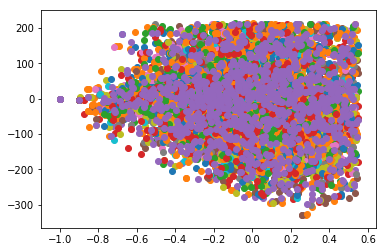

In [63]:
csvdata = "./data/subcategory_2_think_hr_v2.csv"
df = pd.read_csv(csvdata)
df = df[['question_class']][:8000]
df = df.dropna()

N = 15




vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.7
                                 )
X = vectorizer.fit_transform(list(df.question_class))


svd = TruncatedSVD(n_components=75)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)
df["features"] = list(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

cluster(df, X, N, v=True)
plot_clusters(df, N)

